# CIS 360 Final Project
###### Author: Ronald Rounsifer
###### Date: 04.23.2018

In [280]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import pandas as pd
from datetime import datetime
from mpl_toolkits.basemap import Basemap

In [281]:
df = pd.read_csv("./operations.csv", sep=",", low_memory=False)

## Targeted Attacks by Allied Air Forces

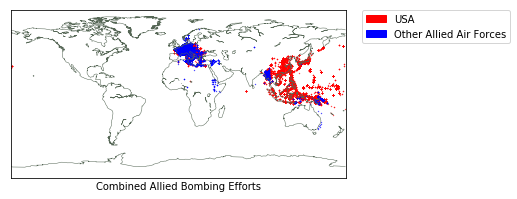

In [282]:
usa = getTargetCoordinates("USA")
everyone_else = getTargetCoordinates("USA", not_this_country=True)

fig, ax = plt.subplots()
earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(usa['Target Longitude'], usa['Target Latitude'], c='red', s=0.1)
ax.scatter(everyone_else['Target Longitude'], everyone_else['Target Latitude'], c='blue', s= 0.1)

ax.set_xlabel("Combined Allied Bombing Efforts")
usa_efforts = mpatches.Patch(color='red', label='USA')
allied_efforts = mpatches.Patch(color='blue', label='Other Allied Air Forces')
plt.legend(handles=[usa_efforts, allied_efforts], bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

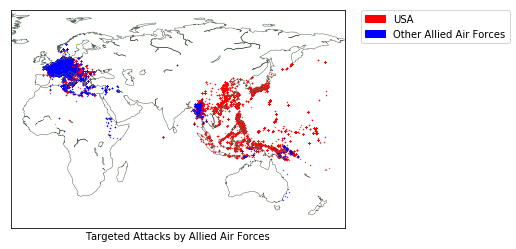

In [283]:
"""
Targeted Attacks by Allied Air Forces
"""
usa = getTargetCoordinates("USA")
everyone_else = getTargetCoordinates("USA", not_this_country=True)

fig, ax = plt.subplots()
earth = Basemap(llcrnrlat=-55, llcrnrlon=-25, urcrnrlat=85, urcrnrlon=190, ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(usa['Target Longitude'], usa['Target Latitude'], c='red', s=0.1)
ax.scatter(everyone_else['Target Longitude'], everyone_else['Target Latitude'], c='blue', s= 0.1)

ax.set_xlabel("Targeted Attacks by Allied Air Forces")
usa_efforts = mpatches.Patch(color='red', label='USA')
allied_efforts = mpatches.Patch(color='blue', label='Other Allied Air Forces')
plt.legend(handles=[usa_efforts, allied_efforts], bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

## Takeoff Locations used by each Allied Country

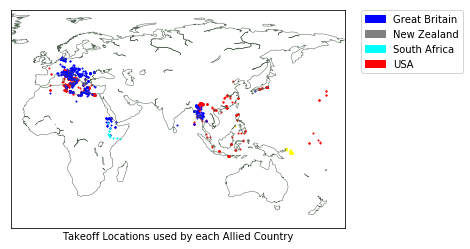

In [284]:
usa = getTakeoffCoordinates("USA")
gb = getTakeoffCoordinates("GREAT BRITAIN")
aus = getTakeoffCoordinates("AUSTRALIA")
nz = getTakeoffCoordinates("NEW ZEALAND")
sa = getTakeoffCoordinates("SOUTH AFRICA")
everyone_else = getTakeoffCoordinates("USA", not_this_country=True)

fig, ax = plt.subplots()
earth = Basemap(llcrnrlat=-55, llcrnrlon=-25, urcrnrlat=85, urcrnrlon=190, ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.5)
ax.scatter(usa['Target Longitude'], usa['Target Latitude'], c='red', s=1)
ax.scatter(gb['Target Longitude'], gb['Target Latitude'], c='blue', s=1)
ax.scatter(nz['Target Longitude'], nz['Target Latitude'], c='yellow', s= 1)
ax.scatter(sa['Target Longitude'], sa['Target Latitude'], c='cyan', s= 1)

ax.set_xlabel("Takeoff Locations used by each Allied Country")
aus_takeoffs = mpatches.Patch(color='yellow', label='Australia')
gb_takeoffs = mpatches.Patch(color='blue', label='Great Britain')
nz_takeoffs = mpatches.Patch(color='grey', label='New Zealand')
sa_takeoffs = mpatches.Patch(color='cyan', label='South Africa')
usa_takeoffs = mpatches.Patch(color='red', label='USA')

plt.legend(handles=[gb_takeoffs, nz_takeoffs, sa_takeoffs,usa_takeoffs], bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

## Amount of Action Seen in each Theatre of War

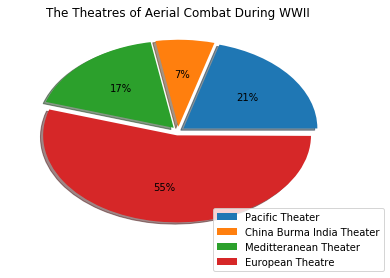

In [327]:
theatre = df["Theater of Operations"].dropna()
theatre_container = getTheaterData()

total = 0
for theatre in theatre_container:
    total += theatre_container[theatre]['total']


percentages = []
for theatre in theatre_container:
    if theatre == "Grand Total":
        pass
    else:    
        percent = float(theatre_container[theatre]['total']) / float(total)
        percentages.append(percent)
            
theatres = [theatre for theatre in theatre_container]     
final_theatres = []
# need to get rid of indices 1 and 2 since they are worth 0%
for place in theatres:
    if place == 'MADAGASCAR' or place == 'EAST AFRICA':
        pass
    else:
        final_theatres.append(place)

final_percentages = []
for percent in percentages:
    if percent < 0.009:
        pass
    else:
        final_percentages.append(percent)
        
labels = final_theatres
fracs = final_percentages
theatres_labels = ['Pacific Theater', 'China Burma India Theater', 
                   'Meditteranean Theater', 'European Theatre']
plt.pie(fracs, labels=None,explode=[0.05 for x in range(len(fracs))], autopct='%1.0f%%', shadow=True, rotatelabels=True)
plt.legend(labels= theatres_labels, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.title("The Theatres of Aerial Combat During WWII")
plt.show()

In [337]:
these_ones = df['Takeoff Latitude'].notnull()& df['Takeoff Longitude'].notnull()& df['Target Latitude'].notnull()& df['Target Longitude'].notnull()& df['Target Priority'].notnull()
mission_df = df[these_ones]

In [389]:
takeoff_lat = [lat for lat in mission_df['Takeoff Latitude']]
takeoff_lon = [lon for lon in mission_df['Takeoff Longitude']]

target_lat = [lat for lat in mission_df['Target Latitude']]
target_lon = [lon for lon in mission_df['Target Longitude']]

lats_to_remove = indicesToRemove(takeoff_lat, 4248)
lons_to_remove = indicesToRemove(takeoff_lon, 4248)

target_lats_to_remove = indicesToRemove(target_lat, 4248)
target_lons_to_remove = indicesToRemove(target_lon, 4248)

all_indices_to_remove = list(set().union(lats_to_remove,lons_to_remove,target_lats_to_remove,target_lons_to_remove))

final_takeoff_lats = []
final_takeoff_lons = []
final_target_lats = []
final_target_lons = []

counter = 0
while counter < len(takeoff_lat):
    if counter in all_indices_to_remove:
        pass
    else:
        final_takeoff_lats.append(takeoff_lat[counter])
        final_takeoff_lons.append(takeoff_lon[counter])
        final_target_lats.append(target_lat[counter])
        final_target_lons.append(target_lon[counter])
    counter += 1

In [397]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True) 

mission_df = df[these_ones]


bases = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = final_takeoff_lons,
        lat = final_takeoff_lats,
#         hoverinfo = 'text',
#         text = df_airports['airport'],
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]






flight_paths= []
for i in range(len(final_takeoff_lats)):
    flight_paths.append(dict(
            type = 'scattergeo',
            locationmode = 'ISO-3',
            lon = [ final_takeoff_lons[i], final_target_lons[i] ],
            lat = [ final_takeoff_lats[i], final_target_lats[i] ],
            hoverinfo = 'lon+lat',
            text = mission_df['Target Priority'],
            mode = 'lines',
            line = dict(
                width = 10,
                color = 'red',
            ),
        opacity = 0.5
    )
)
layout = dict(
        title = 'Attack Missions Flown by Allied Air Forces<br>(Hover for target importance level)',
        showlegend = False, 
        geo = dict(
            scope='world',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
fig = dict( data=flight_paths, layout=layout )
iplot(fig, filename='mission_flights')

### Functions to make this work

In [368]:
def indicesToRemove(data, number):
    indices_to_remove = []
    counter = 0
    for item in data:
        if item == str(number):
            indices_to_remove.append(counter)
        counter += 1
    return indices_to_remove

In [286]:
def getTheaterData():
    locations = {}
    for place in theatre:
        if place not in locations:
            locations[place] = {'total': 1}
        else:
            locations[place]['total'] += 1
    return locations
    
    total_sum = 0
    for place in theatre:
        total_sum += theatre[place]['total']
    theatre['Grand Total']['total'] += total_sum
    
    return theatre
    

In [287]:
def getAirForceOperations():
    air_forces = {}
    # count the occurrences of each air force
    # add to dict if not in it, else increment
    for af in air_force:
        if af not in air_forces:
            air_forces[af] = {'total' : 1}
        else:
            air_forces[af]['total'] += 1

    # total sum of operations flown summation
    total_sum = 0
    for af in air_forces:
        total_sum += air_forces[af]['total']

    # if-guard because why not? 
    if total_sum > 0:
        # Create a percentage attribute and assign it a value
        for af in air_force:
            percentage = float(air_forces[af]['total']) / float(total_sum)
            air_forces[af]['percentage'] = percentage
        # add the total amount of operation to the dictionary
        air_forces['Grand Total'] = {'total' : total_sum}
    return air_forces

In [288]:
def getTargetCoordinates(country, **not_this_country):
    if not_this_country:
        this_country = df['Country'] != country
    else:
        this_country = df['Country'] == country
    target_lat = df['Target Latitude'].notnull()
    target_long = df['Target Longitude'].notnull()
    new_df = df[this_country & target_lat & target_long]
    return new_df

In [289]:
def getTakeoffCoordinates(country, **not_this_country):
    if not_this_country:
        this_country = df['Country'] != country
    else:
        this_country = df['Country'] == country
    takeoff_lat = df['Takeoff Latitude'].notnull()
    takeoff_long = df['Takeoff Longitude'].notnull()
    new_df = df[this_country & takeoff_lat & takeoff_long]
    return new_df